# Monte Carlo Method1
- strong convergence and weak convergence
- Euler Discretization and Milstein Discretization

- Definition of strong convergence  
  The approximation $X_{m}$ converges  in a strong sense to X(T) with order $\alpha > 0 $, if 
  $$ \epsilon^{s}(\triangle{T}) := E[|X_{m} - X(T)|] = O(h^{\alpha})
  $$  
  In nutshell, mean of absolute error in each term
  <br/>
  <br/>    
- Definition of weak convergence  
  For a sufficiently smooth function g(), the approximation $X_{m}$ converges in a weak sense to X(T), with respect to g(), with order $\beta > 0$, if
  $$
  \epsilon^{w}(\triangle{T}) := |E[g(X_{m})] - E[g(X(T))]| = O(h^{\beta})
  $$
  In nutshell, absolute error of mean and expected value

Base on PDE

$$
dS_{t} = \mu(t,S)dt + \sigma(t,S)dW(t)
$$
- Analytical formula(GBM)
$$
In(S_{t}) = In(S_{t-1}) + (\mu - \frac{1}{2}\sigma^2)\Delta{t} + \sigma\sqrt{\Delta(t)}Z,with Z\sim N(0,1)
$$
- Euler scheme and derivation
$$
S_{i + 1} = S_{i} + \mu(S_{i},t_{i})\Delta{t} + \sigma(S_{i},t_{i})\Delta{W_{i}} 
$$
$$
\Delta{W_{i}} = W_{i + 1} - W_{i} = Z \sqrt{\Delta(t)}, with Z\sim N(0,1)
$$
- Milstein scheme and derivation
$$
S_{i + 1} = S_{i} + \mu(S_{i},t_{i})\Delta{t} + \sigma(S_{i},t_{i})\Delta{W_{i}} + \frac{1}{2}\sigma(S_{i},t_{i})\frac{\partial \sigma}{\partial x}(S_{i},t_{i}) (W^{2}(\Delta(t)))
$$

- Derivation:
Based on ito's lemma:
$$
S_{t + \Delta{t}} = S_{t}\exp(\int_{t}^{t + \Delta{t}}(\mu - \frac{1}{2}\sigma^2)dt + \int_{t}^{t + \Delta{t}}(\sigma)dW(t)) \\

\approx S_{t}(1 + \mu\Delta{t} - \frac{1}{2}\sigma^2\Delta{t}+ \sigma\Delta{W_{t}} + \frac{1}{2}\sigma^2(\Delta{W_{t}}^2)) \\
 = S_{t} +a(S_{t})\Delta{t} + b(S_{t})\Delta{W_{t}} + \frac{1}{2}b(S_{t})b^{'}(S_{t})((\Delta{W_{t}})^2 - \Delta{t}), where \, a(x) =  \mu S_{t}, b(x) = \sigma S_{t}
$$




In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
r = 0.03
s0 = 100
sigma = 0.2
nPaths = 1000
nSteps = 1000
T = 1
deltaT = T / nSteps

Z = np.random.randn(nPaths,nSteps + 1)
Z[:,0] = 0


mean = 102.504, std = 0.643


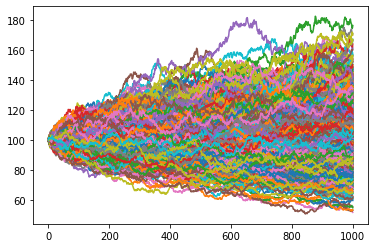

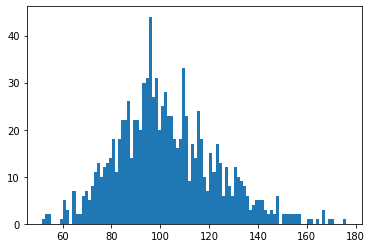

In [20]:
## generate GBM based on Analytical formula
path_GBM = np.zeros([nPaths,nSteps + 1])
path_GBM[:,0] = 0
f1 = (r - 0.5*sigma**2)*deltaT
f2 = sigma*np.sqrt(deltaT)
z1 = f1 + f2 *Z
z1[:,0] = 0
path_GBM = np.cumsum(z1,axis = 1)
path_GBM = s0 * np.exp(path_GBM)
plt.figure(1)
for i in range(nPaths):
    plt.plot(path_GBM[i])

plt.figure(2)
_ = plt.hist(path_GBM[:,-1],bins = 100)
print('mean = {}, std = {}'.format(round(np.mean(path_GBM[:,-1]),3),round(np.std(path_GBM[:,-1]) / np.sqrt(nPaths),3)))

mean = 102.499, std = 0.643


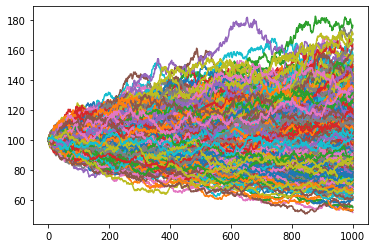

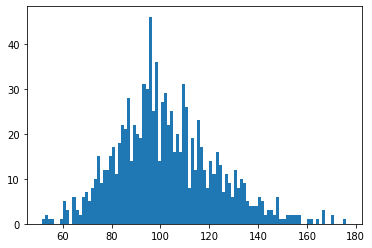

In [21]:
## generate GBM based on Euler scheme
path_euler = np.zeros([nPaths,nSteps + 1])
path_euler[:,0] = s0
e1 = r * deltaT
e2 = sigma*np.sqrt(deltaT)
for i in range(nSteps):
    path_euler[:,i + 1] = path_euler[:,i] + e1 * path_euler[:,i] + e2 * path_euler[:,i] * Z[:,i+1]
plt.figure(1)
for i in range(nPaths):
    plt.plot(path_euler[i])
plt.figure(2)
_ =plt.hist(path_euler[:,-1],bins = 100)
print('mean = {}, std = {}'.format(round(np.mean(path_euler[:,-1]),3),round(np.std(path_euler[:,-1]) / np.sqrt(nPaths),3)))

mean = 102.504, std = 0.643


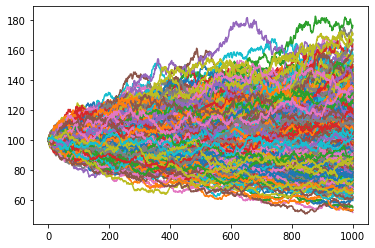

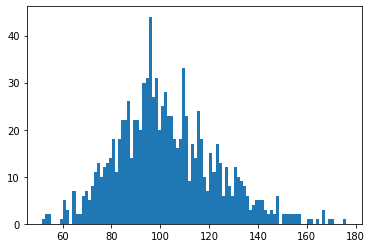

In [22]:
## generate GBM based on Milstein scheme
path_milstein = np.zeros([nPaths,nSteps + 1])
path_milstein[:,0] = s0
e1 = r * deltaT
e2 = sigma*np.sqrt(deltaT)
e3 = 0.5 * sigma**2 
for i in range(nSteps):
    path_milstein[:,i + 1] = path_milstein[:,i] + r * deltaT * path_milstein[:,i] + sigma * path_milstein[:,i] * Z[:,i+1] * np.sqrt(deltaT) \
                            + 0.5 * sigma**2 * path_milstein[:,i] * ((Z[:,i+1] * np.sqrt(deltaT))**2 - deltaT)
plt.figure(1)
for i in range(nPaths):
    plt.plot(path_milstein[i])
plt.figure(2)
_=plt.hist(path_milstein[:,-1],bins = 100)
print('mean = {}, std = {}'.format(round(np.mean(path_milstein[:,-1]),3),round(np.std(path_milstein[:,-1]) / np.sqrt(nPaths),3)))

In [23]:
# compare strong & weak convergence
strong_converge1 = []
strong_converge2 = []
weak_converge1 = []
weak_converge2 = []
for i in range(1,nPaths + 1):
    mean_ana = np.mean(path_GBM[:,i])
    mean_eul = np.mean(path_euler[:,i])
    mean_mlst = np.mean(path_milstein[:,i])
    
    error_s1 = np.mean(abs(path_euler[:,i] - path_GBM[:,i]))
    error_w1 = abs(mean_ana - mean_eul)
    strong_converge1.append(error_s1)
    weak_converge1.append(error_w1)
    
    error_s2 = np.mean(abs(path_milstein[:,i] - path_GBM[:,i]))
    error_w2 = abs(mean_ana - mean_mlst)
    strong_converge2.append(error_s2)
    weak_converge2.append(error_w2)

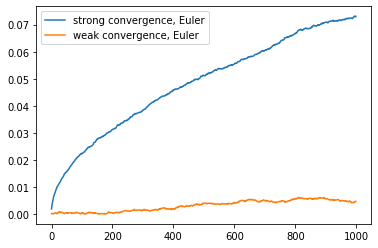

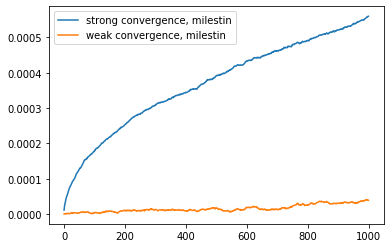

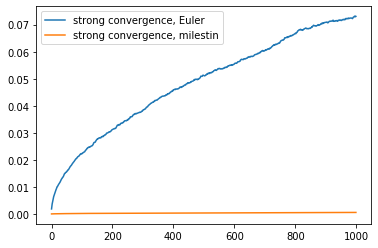

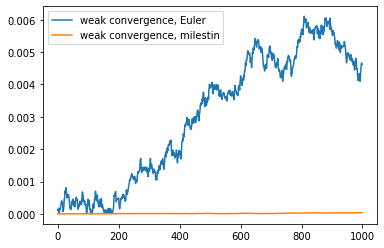

In [24]:
plt.figure(1)
plt.plot(strong_converge1,label='strong convergence, Euler')
plt.plot(weak_converge1,label='weak convergence, Euler')
plt.legend()

plt.figure(2)
plt.plot(strong_converge2,label='strong convergence, milestin')
plt.plot(weak_converge2,label='weak convergence, milestin')
plt.legend()

plt.figure(3)
plt.plot(strong_converge1,label='strong convergence, Euler')
plt.plot(strong_converge2,label='strong convergence, milestin')
plt.legend()

plt.figure(4)
plt.plot(weak_converge1,label='weak convergence, Euler')
plt.plot(weak_converge2,label='weak convergence, milestin')
plt.legend()